In [1]:
from quimb import *
from quimb.tensor import *
import quimb as qu
import numpy as np
import quimb.tensor as qtn
import quf
import matplotlib.pyplot as plt
from numpy import linalg as LA
import string
import cotengra as ctg
import math
seed_val=2
d=2
D=4
L_x=2
L_y=2
seed_0=10

In [2]:
peps = qtn.PEPS.rand(Lx=L_x, Ly=L_y, bond_dim=1, phys_dim=2)
#peps.show()
#peps.graph(color=peps.site_tags, show_tags=True, figsize=(10, 10))
#peps._EXTRA_PROPS
#print (peps)



psi=peps.view_as(
    qtn.tensor_2d.TensorNetwork2DVector,
    Lx=L_x,
    Ly=L_y,
    site_ind_id='k{},{}',
    site_tag_id='I{},{}',
    row_tag_id='ROW{}',
    col_tag_id='COL{}',
)


#psi=qtn.tensor_2d.TensorNetwork2DVector(peps, virtual=False, check_collisions=True)



for t in psi:
  #print (t, list(t.tags))
  A=list(t.tags)
  t.modify(left_inds=())
  t.modify(tags=A+["PEPS"])



#vec_2d.normalize_()
psi.unitize_(method='mgs')

TN=psi.H & psi
print("init", TN^all)



n_apply=0
list_u3=[]
G = qu.randn(( 2, 2, 2, 2 ), dtype='float64', dist="uniform")
#psi.gate_(G, (i-1, i - 2), tags={'U',f'G{n_apply}',f'lay{Qubit_ara}'})

for i in range(0,L_x,2):
 for j in range(0,L_y):
    #print(   ((i,j), ( (i+1)%L_x,j)) )
    psi.gate_(G, ((i,j), ( (i+1)%L_x,j)), tags={'U', 'lay1', f'G{n_apply}'})
    list_u3.append(f'G{n_apply}')
    n_apply+=1




for i in range(0,L_x,2):
 for j in range(0,L_y):
    #print(   ((i+1,j), ( (i+2)%L_x,j)) )
    psi.gate_(G, ((i+1,j), ( (i+2)%L_x,j)), tags={'U', 'lay2', f'G{n_apply}'})
    list_u3.append(f'G{n_apply}')
    n_apply+=1







  

for j in range(0,L_y,2):
 for i in range(0,L_x):
    #print(   ((i,j), ( i,(j+1)%L_x)) )
    psi.gate_(G, ((i,j), ( i,(j+1)%L_x)), tags={'U', 'lay3', f'G{n_apply}'})
    list_u3.append(f'G{n_apply}')
    n_apply+=1





for j in range(0,L_y,2):
 for i in range(0,L_x):
    #print(   ((i,j+1), ( i,(j+2)%L_x)) )
    psi.gate_(G, ((i,j+1), ( i,(j+2)%L_x)), tags={'U', 'lay4', f'G{n_apply}'})
    list_u3.append(f'G{n_apply}')
    n_apply+=1






init 1.0000000000000002


In [3]:
psi=quf.convert_wave_function_to_real_2D(psi, L_x, L_x, list_u3)

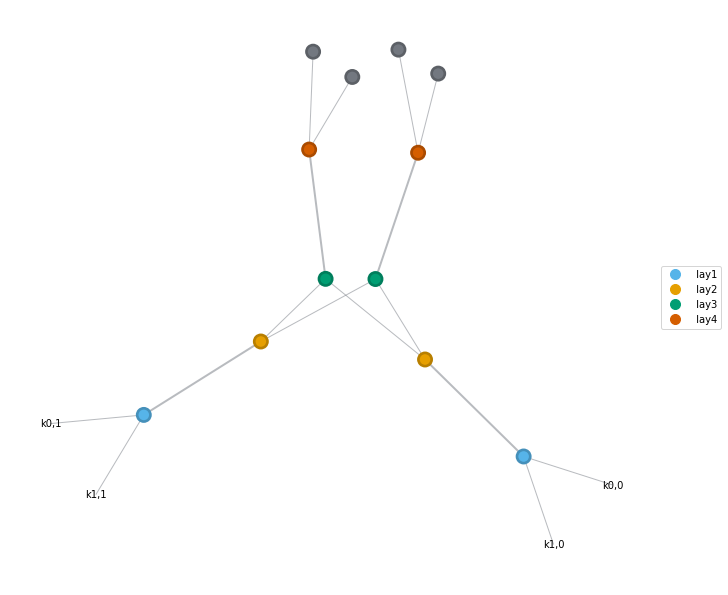

1_Qubit [0, 1] site= 0 layer= 0 max_bond= 2
G_e 0 1 0
1_Qubit [2, 3] site= 2 layer= 0 max_bond= 2
G_e 2 3 1
1_Qubit [4, 5] site= 4 layer= 0 max_bond= 2
G_e 4 5 2
1_Qubit [6, 7] site= 6 layer= 0 max_bond= 2
G_e 6 7 3
1_Qubit [8, 9] site= 8 layer= 0 max_bond= 2
G_e 8 9 4
1_Qubit [10, 11] site= 10 layer= 0 max_bond= 2
G_e 10 11 5
1_Qubit [12, 13] site= 12 layer= 0 max_bond= 2
G_e 12 13 6
1_Qubit [14, 15] site= 14 layer= 0 max_bond= 2
G_e 14 15 7
2_Qubit [1, 2] site= 0 layer= 0
G_e 1 2 8
2_Qubit [3, 4] site= 2 layer= 0
G_e 3 4 9
2_Qubit [5, 6] site= 4 layer= 0
G_e 5 6 10
2_Qubit [7, 8] site= 6 layer= 0
G_e 7 8 11
2_Qubit [9, 10] site= 8 layer= 0
G_e 9 10 12
2_Qubit [11, 12] site= 10 layer= 0
G_e 11 12 13
2_Qubit [13, 14] site= 12 layer= 0
G_e 13 14 14
2_Qubit [15, 0] site= 14 layer= 0
G_e 15 0 15
1_Qubit [15, 0, 1, 2] site= 0 layer= 1 max_bond= 4
G_e 15 0 16
G_e 1 2 17
G_o 0 1 18
1_Qubit [3, 4, 5, 6] site= 4 layer= 1 max_bond= 4
G_e 3 4 19
G_e 5 6 20
G_o 4 5 21
1_Qubit [7, 8, 9, 10] site= 

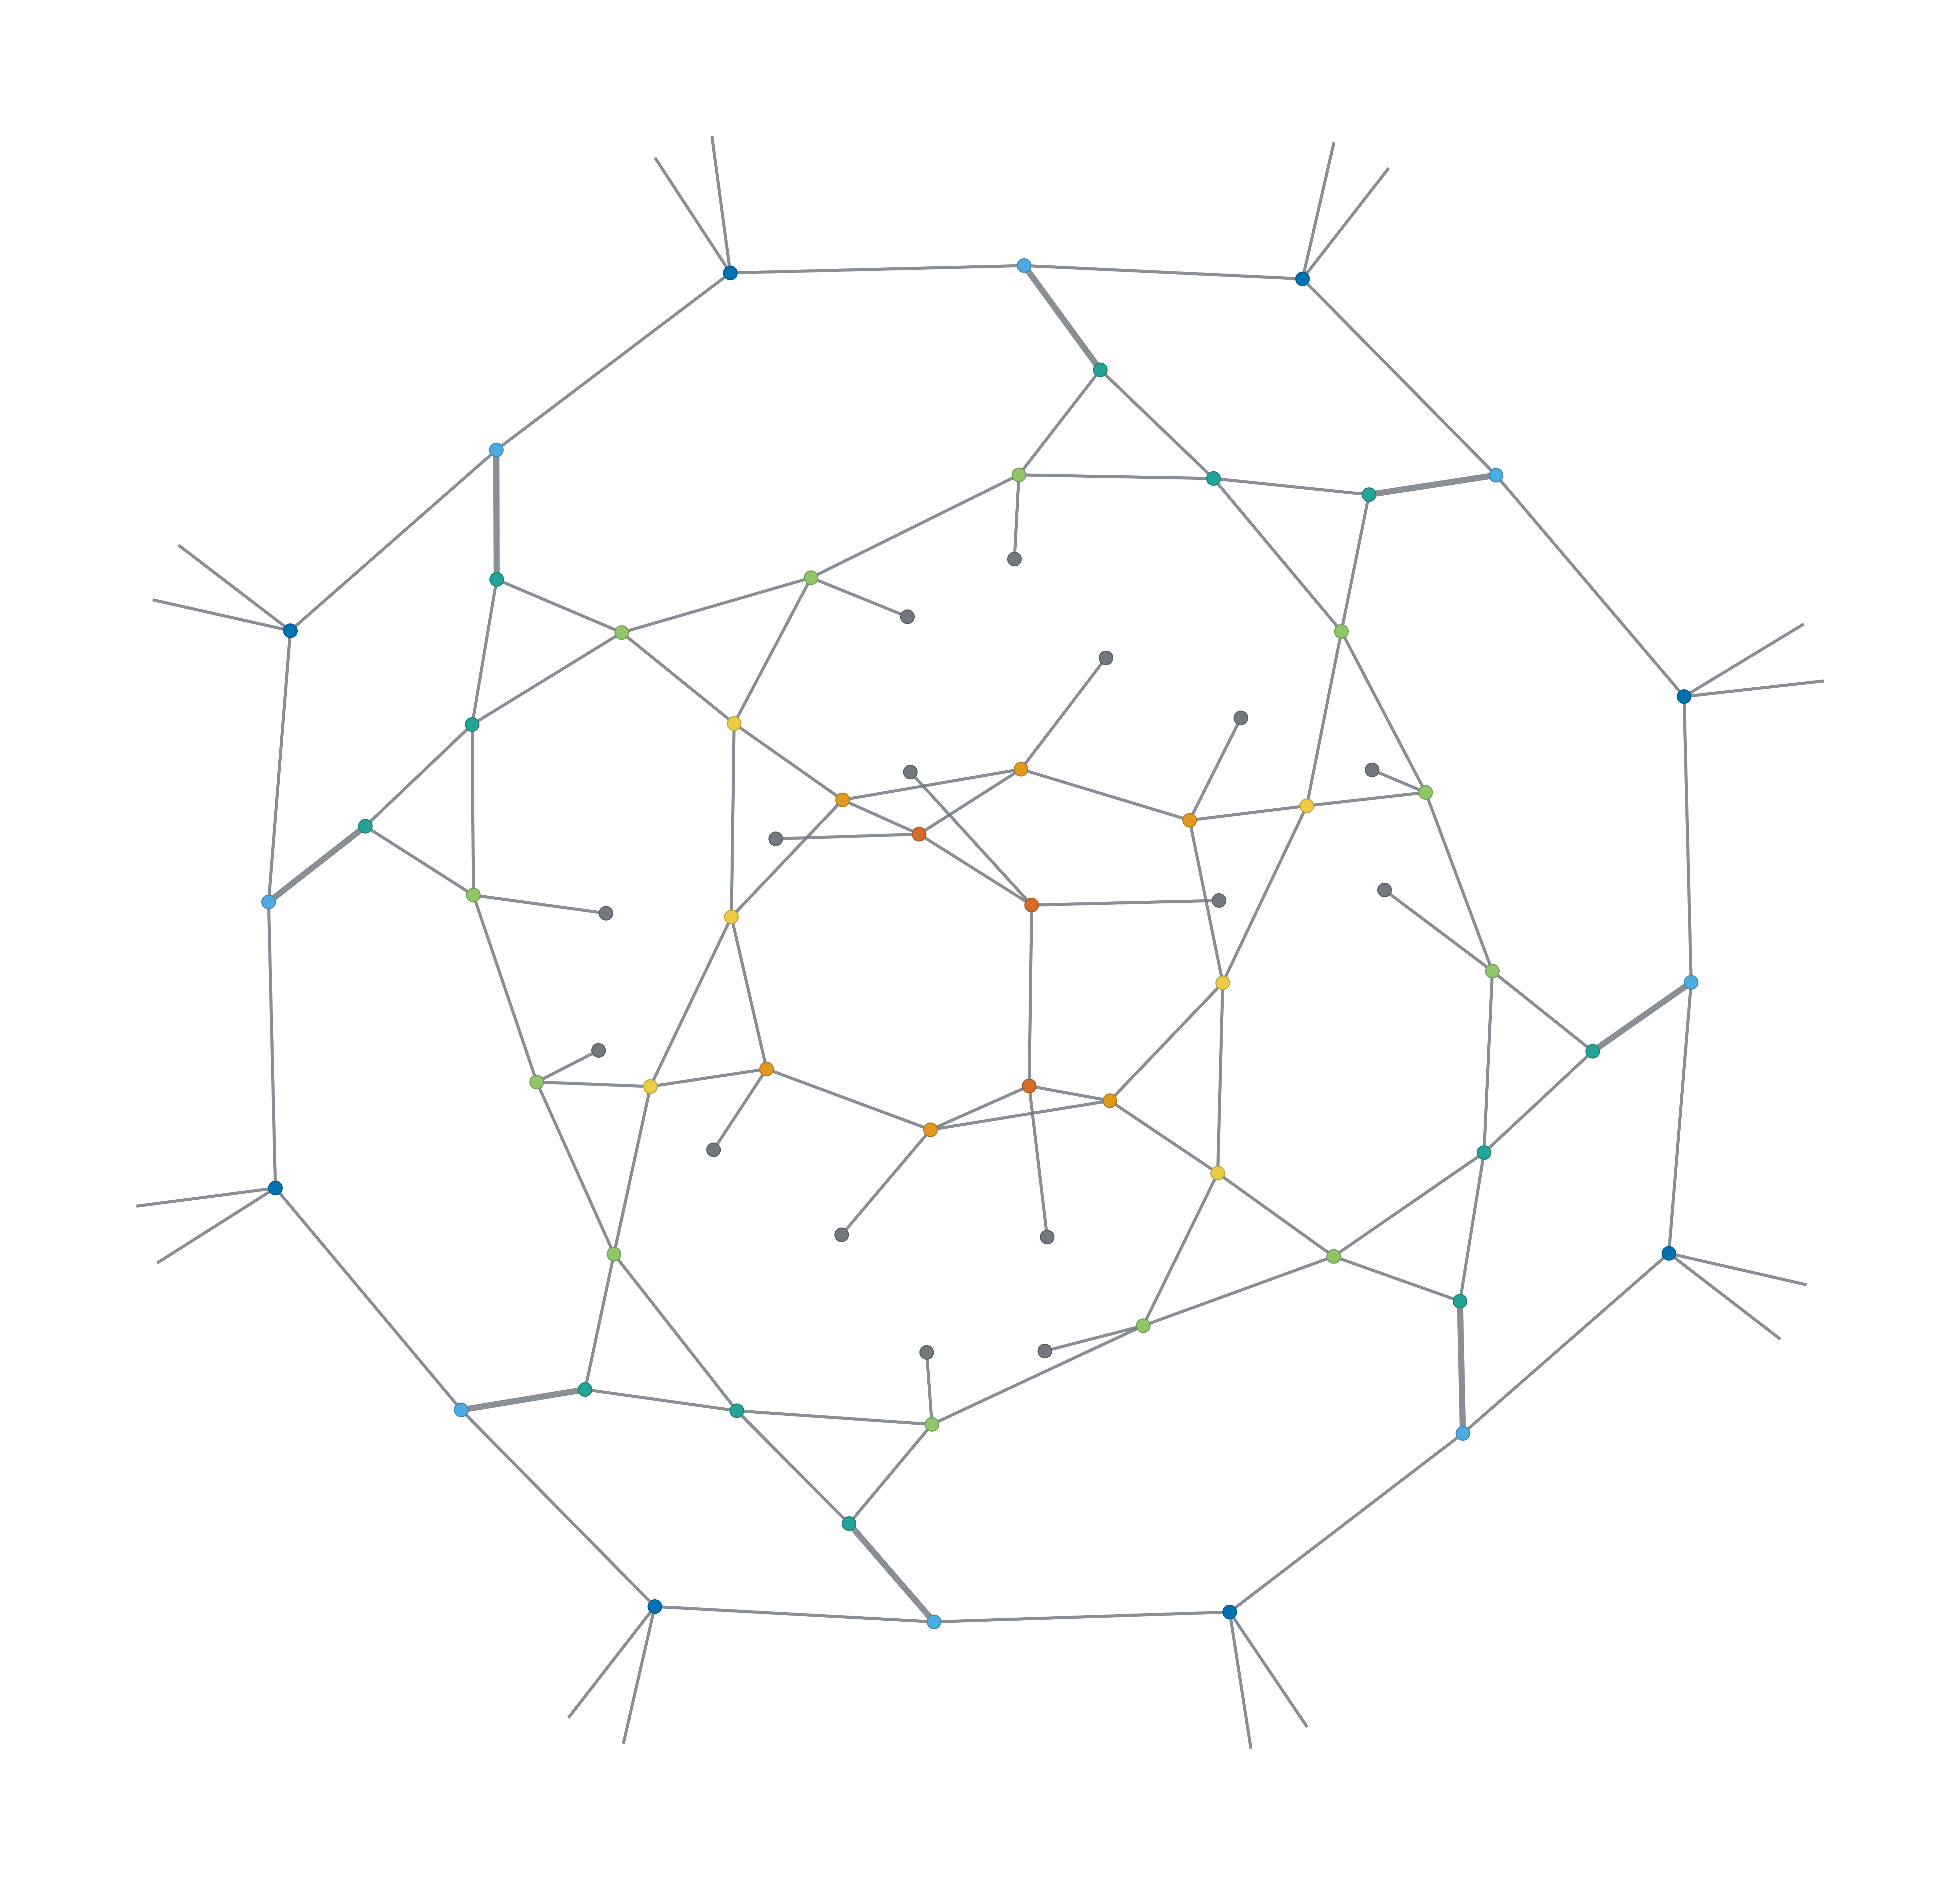

In [4]:
psi.graph(color=["lay1","lay2","lay3","lay4"], show_tags=False, show_inds=True, figsize=(10, 10))
psi.unitize_(method='mgs')

#TN=psi.H & psi
#print("F", TN.contract(optimize='auto-hq'))

#print (psi)


L_L=16
qmera,tag=quf.qmera_f(L=L_L,in_depth=2,n_Qbit=2,depth_total=int(math.log2(L_L)),qmera_type='brickwall') 
qmera.graph( color=["uni0","uni1","uni2","uni3","uni4","uni5", "uni6", "uni7"], show_inds=False, show_tags=False, iterations=1000, figsize=(80, 80) , legend=False, node_size=1600 , edge_scale=9, initial_layout='spectral', edge_alpha=0.83,)



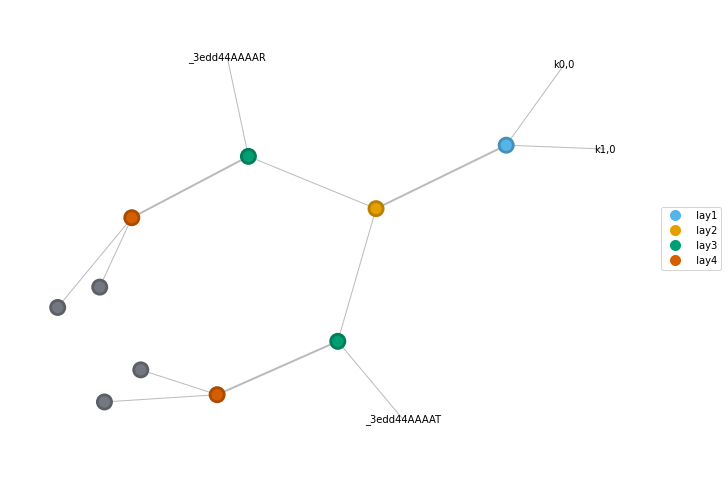

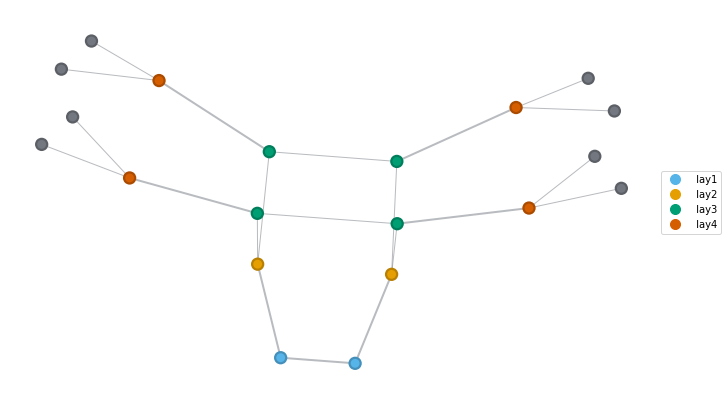

0.9999999999999996


In [5]:
tag_local=(psi.site_tag(0,0),psi.site_tag(0,1) )
tag_local=(psi.site_tag(0,0) )

psi_ij = psi.select(tag_local, 'any')
psi_ij.graph(color=["lay1", "lay2", "lay3", "lay4"], show_tags=False, show_inds=True, figsize=(10, 10))

TN_ij=psi_ij & psi_ij.H

TN_ij.graph(color=["lay1", "lay2", "lay3", "lay4"], show_tags=False, show_inds=True, figsize=(10, 10))

print( (psi_ij & psi_ij.H)^all )


In [6]:
ZZ = pauli('Z', dtype="float64") & pauli('Z',dtype="float64")
XX = pauli('X', dtype="float64") & pauli('X',dtype="float64")
XI = pauli('X',dtype="float64") & pauli('I',dtype="float64")
IX = pauli('I',dtype="float64") & pauli('X',dtype="float64")

h=0.0
H_ham=ZZ+h*(XI+XI)

#H_ham = qu.ham_heis(2).real.astype('float64')
H_ham=H_ham.astype('float64')
print (H_ham)

terms_x = {       (   (i,j) , ((i + 1) % L_x,j)   )    :   H_ham            for i in range(L_x) for j in range(L_y) }
terms_y = {       (   (i,j) , (i,(j + 1) % L_y)   )    :    H_ham            for i in range(L_x) for j in range(L_y) }


terms = terms_x.copy()
terms.update(terms_y)




[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  1.]]


In [7]:
opt = ctg.ReusableHyperOptimizer(
     progbar=True,
     reconf_opts={},
     max_repeats=32,
     parallel=True,
     directory="cash/"
 )
opt='auto-hq'


def local_expectation_mera(mera, terms, where, optimize='auto-hq'):
 list_where=list(where)
 x,y=list_where[0]
 x1,y1=list_where[1]


 tags = [ mera.site_tag(x,y)] + [ mera.site_tag(x1,y1)]


 mera_ij = mera.select(tags, which='any')
 mera_ij_G=mera_ij.gate(terms[where], where)
 mera_ij_ex = (mera_ij_G & mera_ij.H)
 mera_ij_ex_norm = (mera_ij & mera_ij.H)

 #print (where, mera_ij_ex.contract(all, optimize=optimize), mera_ij_ex_norm.contract(all, optimize=optimize))
 return mera_ij_ex.contract(all, optimize=optimize) 


def norm_f(psi):
    # method='qr' is the default but the gradient seems very unstable
    # 'mgs' is a manual modified gram-schmidt orthog routine
    return psi.unitize(method='mgs')


def energy_f_qmera(psi, terms, **kwargs):
    """Compute the total energy as a sum of all terms.
    """
    return sum(
        local_expectation_mera(psi, terms, where, **kwargs)
        for where in terms
    )



tnopt = qtn.TNOptimizer(
      psi,                          # the initial TN
      loss_fn=energy_f_qmera,                         # the loss function
      norm_fn=norm_f,                         # this is the function that 'prepares'/constrains the tn
      constant_tags=[],                 
      tags=["U"],
      loss_constants={'terms': terms },  # additional tensor/tn kwargs
      loss_kwargs={'optimize': opt},
     autodiff_backend="tensorflow",   # use 'autograd' for non-compiled optimization
     optimizer='L-BFGS-B',     # the optimization algorithm
  )

#print (energy_f_qmera(psi, terms) )



tnopt.optimize(n=300)


ModuleNotFoundError: No module named 'tensorflow'